In [1]:
import numpy as np
import scipy as sp
import networkx as nx
from matplotlib import pyplot as plt, patches, cm
from scipy.spatial import Voronoi, voronoi_plot_2d

In [2]:
n = 24
data = -1 + 2*np.random.random(size=(n, 2))

In [3]:
r = 0.2

/tmp/ipykernel_18378/3735096346.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


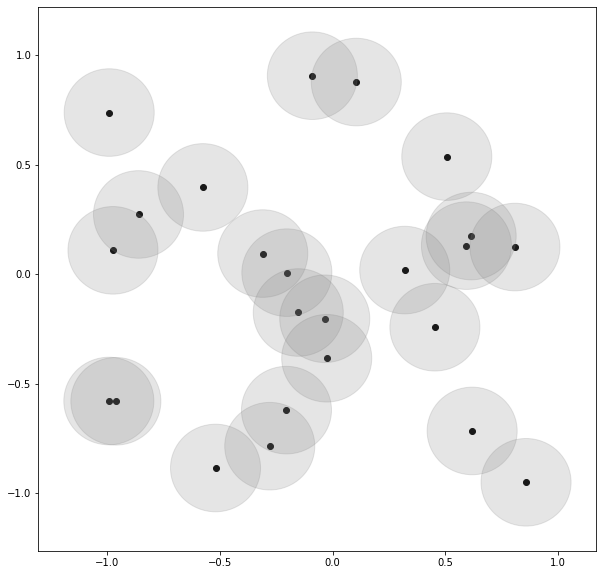

In [4]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()

plt.scatter(data[:,0], data[:,1], color='black')
for point in data:
    circle = patches.Circle(point, radius=r, color='grey', alpha=0.2)
    ax.add_patch(circle)
fig.show()

In [5]:
def random_points_in_disks(n=100):
    # returns cords of n random points uniformly distributed in unit disks
    angle = 2*np.pi*np.random.random(n)
    radius = np.random.random(n)
    return np.array([np.cos(angle), np.sin(angle)]).transpose() * radius.reshape([n, 1])

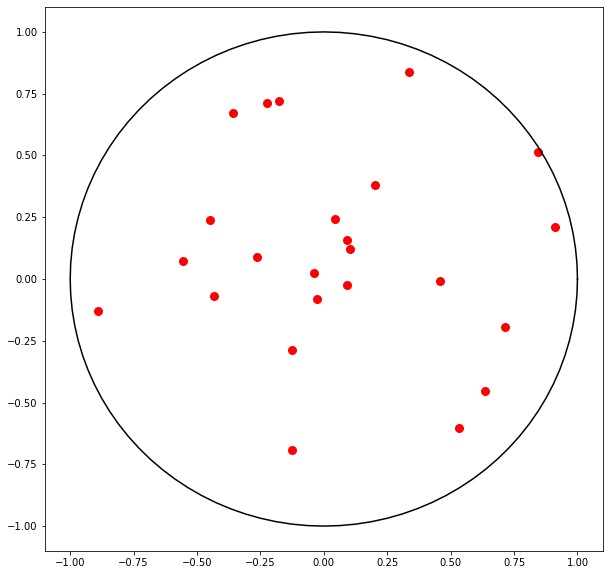

In [6]:
p = random_points_in_disks(n)
plt.figure(figsize=(10, 10))
plt.scatter(p[:, 0], p[:, 1], color='red', linewidth=3)
plt.plot(1.00*np.cos(0.02*np.pi*np.arange(101)), 1.00*np.sin(0.02*np.pi*np.arange(101)), color='black')
plt.show()

In [7]:
def gen_RGG_verticies(points, radius):
    # generate cords of RGG by given radius
    n = len(points)
    return points + radius*random_points_in_disks(n)

In [8]:
rgg_verts = gen_RGG_verticies(data, r)

In [9]:
def get_distances(points, norm=np.linalg.norm):
    # 
    mat = np.concatenate([[points] for i in points])
    dis = mat - mat.transpose((1, 0, 2))
    dis = norm(dis, axis=2)
    return dis

In [10]:
def get_RGG_graph(verts, radius):
    # returns graph
    adj_mat = get_distances(verts) <= 2*radius
    adj_mat[np.eye(len(adj_mat), dtype=bool)] = False
    graph = nx.Graph(adj_mat)
    return graph

In [11]:
def get_clusters(verts, radius):
    # returns components
    graph = get_RGG_graph(verts, radius)
    clusters = [list(i) for i in nx.connected_components(graph)]
    return clusters

In [12]:
def node_colors(clusters, colormap=cm.rainbow):
    n = len(np.concatenate(clusters))
    colors = np.zeros((n, 4))
    for i in range(len(clusters)):
        color = np.array(colormap(i/(len(clusters)-1)))
        colors[clusters[i]] = color
    return colors

/tmp/ipykernel_18378/887861792.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


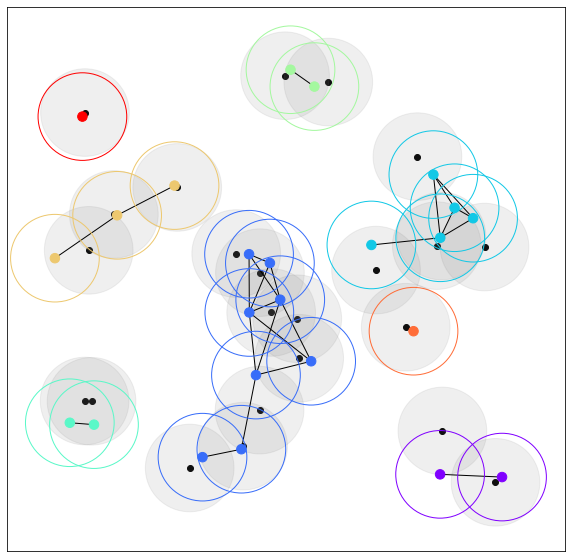

In [13]:
rgg_verts = gen_RGG_verticies(data, r)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()

plt.scatter(data[:,0], data[:,1], color='black')
for point in data:
    circle = patches.Circle(point, radius=r, color='grey', alpha=0.12)
    ax.add_patch(circle)

rgg_graph = get_RGG_graph(rgg_verts, r)
rgg_clusters = get_clusters(rgg_verts, r)
colors = node_colors(rgg_clusters)

nx.draw_networkx(rgg_graph, pos=rgg_verts, node_color=colors, with_labels=False, node_size=90)
for i in range(len(rgg_verts)):
    point = rgg_verts[i]
    color = colors[i]
    circle = patches.Circle(point, radius=r, color=color, alpha=1.0, fill=False)
    ax.add_patch(circle)

fig.show()

<Figure size 720x720 with 0 Axes>

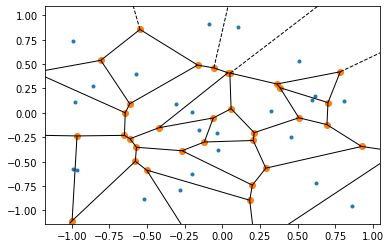

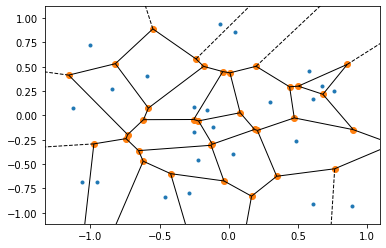

In [14]:
vor0 = Voronoi(data)
vor1 = Voronoi(rgg_verts)

plt.figure(figsize=(10, 10))
voronoi_plot_2d(vor0)
voronoi_plot_2d(vor1)
plt.show()

# About additional node layer

In [15]:
r = 0.15

points0 = data
points1 = points0 + r*random_points_in_disks(len(points0))


/tmp/ipykernel_18378/2402347305.py:29: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


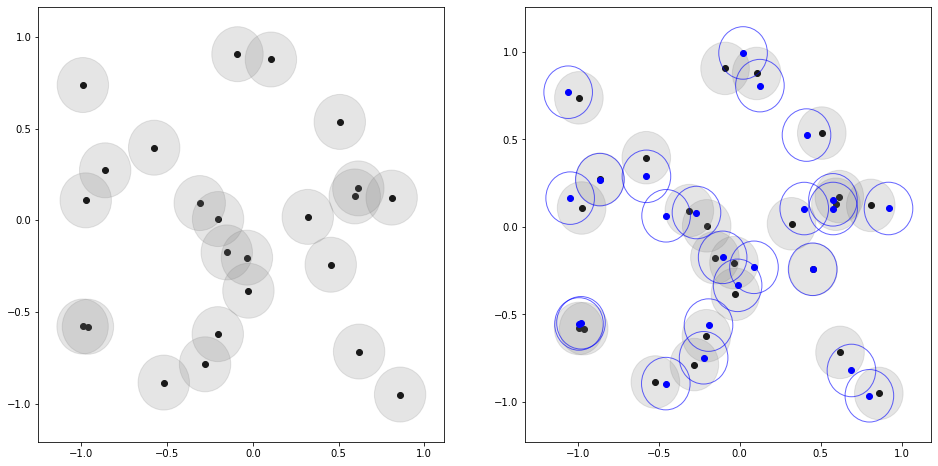

In [19]:
fig, axs = plt.subplots(1, 2)
fig.set_figheight(8)
fig.set_figwidth(16)

# Simple process
ax = axs[0]

ax.scatter(points0[:,0], points0[:,1], color='black')
for point in points0:
    circle = patches.Circle(point, radius=r, color='grey', alpha=0.2)
    ax.add_patch(circle)

    
# Additional process
ax = axs[1]

ax.scatter(points0[:,0], points0[:,1], color='black')
for point in points0:
    circle = patches.Circle(point, radius=r, color='grey', alpha=0.2)
    ax.add_patch(circle)
    
ax.scatter(points1[:,0], points1[:,1], color='blue')
for point in points1:
    circle = patches.Circle(point, radius=r, edgecolor='blue', alpha=0.6, fill=False)
    ax.add_patch(circle)



fig.show()